In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/beccadsouza/CIS-680-Projects.git

Cloning into 'CIS-680-Projects'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
import numpy as np
# import utils
import torchvision
from torchvision import transforms

import time
from torchvision.models.detection.image_list import ImageList
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import h5py
from torch.utils.data import Dataset, DataLoader
import h5py

In [ ]:
# import torchvision
# import torch
# from dataset import *


def pretrained_models_680(checkpoint_file,eval=True):
    import torchvision
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=False)

    if(eval):
        model.eval()

    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.to(device)

    backbone = model.backbone
    rpn = model.rpn

    if(eval):
        backbone.eval()
        rpn.eval()

    rpn.nms_thresh=0.6
    checkpoint = torch.load(checkpoint_file)

    backbone.load_state_dict(checkpoint['backbone'])
    rpn.load_state_dict(checkpoint['rpn'])

    return backbone, rpn

# if __name__ == '__main__':

#     # Put the path were you save the given pretrained model
#     pretrained_path='checkpoint680.pth'
#     device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#     backbone, rpn = pretrained_models_680(pretrained_path)

#     # we will need the ImageList from torchvision
#     from torchvision.models.detection.image_list import ImageList


#     imgs_path = './data/hw3_mycocodata_img_comp_zlib.h5'
#     masks_path = './data/hw3_mycocodata_mask_comp_zlib.h5'
#     labels_path = "./data/hw3_mycocodata_labels_comp_zlib.npy"
#     bboxes_path = "./data/hw3_mycocodata_bboxes_comp_zlib.npy"

#     paths = [imgs_path, masks_path, labels_path, bboxes_path]
#     # load the data into data.Dataset
#     dataset = BuildDataset(paths)

#     # Standard Dataloaders Initialization
#     full_size = len(dataset)
#     train_size = int(full_size * 0.8)
#     test_size = full_size - train_size

#     torch.random.manual_seed(1)
#     train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

#     batch_size = 10
#     print("batch size:", batch_size)
#     test_build_loader = BuildDataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
#     test_loader = test_build_loader.loader()


#     # Here we keep the top 20, but during training you should keep around 200 boxes from the 1000 proposals
#     keep_topK=20

#     with torch.no_grad():
#         for iter, batch in enumerate(test_loader, 0):
#             images = batch['images'].to(device)

#             # Take the features from the backbone
#             backout = backbone(images)

#             # The RPN implementation takes as first argument the following image list
#             im_lis = ImageList(images, [(800, 1088)]*images.shape[0])
#             # Then we pass the image list and the backbone output through the rpn
#             rpnout = rpn(im_lis, backout)

#             #The final output is
#             # A list of proposal tensors: list:len(bz){(keep_topK,4)}
#             proposals=[proposal[0:keep_topK,:] for proposal in rpnout[0]]
#             # A list of features produces by the backbone's FPN levels: list:len(FPN){(bz,256,H_feat,W_feat)}
#             fpn_feat_list= list(backout.values())

#             print("For the proposals We have a list containing "+str(len(proposals))+" tensors")
#             print("Each one with shape "+str(proposals[0].shape))
#             print("")
#             print("For the features we have a list of features for each FPN level with shapes")
#             for feat in fpn_feat_list:
#                 print(feat.shape)


#             # Visualization of the proposals
#             for i in range(batch_size):
#                 img_squeeze = transforms.functional.normalize(images[i,:,:,:].to('cpu'),
#                                                               [-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
#                                                               [1 / 0.229, 1 / 0.224, 1 / 0.225], inplace=False)
#                 fig,ax=plt.subplots(1,1)
#                 ax.imshow(img_squeeze.permute(1,2,0))


#                 for box in proposals[i]:
#                     box=box.view(-1)
#                     rect=patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],fill=False,color='b')
#                     ax.add_patch(rect)
#                 plt.show()

#             break

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
if __name__ == '__main__':
    # file path and make a list
    imgs_path = '/content/drive/MyDrive/CIS680_2021/HW3/hw3_mycocodata_img_comp_zlib.h5'
    masks_path = '/content/drive/MyDrive/CIS680_2021/HW3/hw3_mycocodata_mask_comp_zlib.h5'
    labels_path = '/content/drive/MyDrive/CIS680_2021/HW3/hw3_mycocodata_labels_comp_zlib.npy'
    bboxes_path = '/content/drive/MyDrive/CIS680_2021/HW3/hw3_mycocodata_bboxes_comp_zlib.npy'

    

    paths = [imgs_path, masks_path, labels_path, bboxes_path]
    # load the data into data.Dataset
    dataset = BuildDataset(paths)
    pretrained_path = '/content/drive/MyDrive/CIS680_2021/HW_4/checkpoint680.pth'

In [ ]:

full_size = len(dataset)
print(full_size)
train_size = int(full_size * 0.8)
test_size = full_size - train_size


train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])


batch_size = 2
train_build_loader = BuildDataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
train_loader = train_build_loader.loader()
test_build_loader = BuildDataLoader(test_dataset, batch_size=1, shuffle=True, num_workers=0)
test_loader = test_build_loader.loader()

3265


In [ ]:
import torch
import torch.nn.functional as F
from torch import nn
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


class BoxHead(torch.nn.Module):
    def __init__(self,Classes=3,P=7):
        super(BoxHead,self).__init__()
        self.C=Classes
        self.P=P
        self.device= torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
        # TODO initialize BoxHead
        self.thresh = 0.5
        self.eval = False
        self.batch_size = 32
        self.intermediate = nn.ModuleList([
                                nn.Sequential(
                                    nn.Linear(256*self.P*self.P, 1024),
                                    nn.ReLU(inplace=False)
                                ),
                                nn.Sequential(
                                    nn.Linear(1024, 1024),
                                    nn.ReLU(inplace=False)
                                )
        ])
        self.classifier = nn.Sequential(nn.Linear(1024, self.C + 1))
        self.regressor =  nn.Sequential(nn.Linear(1024, 4*self.C))
       # https://stackoverflow.com/questions/55613518/how-does-the-applyfn-function-in-pytorch-work-with-a-function-without-return-s
        for module in self.intermediate:
            module.apply(self.init_weights)
        self.classifier.apply(self.init_weights)
        self.regressor.apply(self.init_weights)  
        
    def init_weights(self, l):
        if type(l) == nn.Linear:
            nn.init.normal_(l.weight, mean=0.0, std=0.01)
            l.bias.data.fill_(0)

    def init_eval(self,boolean):
        self.eval = boolean

    # Forward the pooled feature vectors through the intermediate layer and the classifier, regressor of the box head
    # Input:
    #        feature_vectors: (total_proposals, 256*P*P)
    # Outputs:
    #        class_logits: (total_proposals,(C+1)) (we assume classes are C classes plus background, notice if you want to use
    #                                               CrossEntropyLoss you should not pass the output through softmax here)
    #        box_pred:     (total_proposals,4*C)
    def forward(self, feature_vectors):
        X = feature_vectors
        for module in self.intermediate: 
            X = module(X)
        class_logits = self.classifier(X)
        box_pred = self.regressor(X) 

        if self.eval:
          self.softmax = nn.Softmax(dim = 1)
          class_logits = self.softmax(class_logits)
            
        return class_logits, box_pred
    

    def create_ground_truth(self,proposals,gt_labels,bboxes):
        labels = []
        regressor_target=[]
        # print(bboxes)
        
        for i in range(len(proposals)):
            bbox = bboxes[i].to(device)
            bbox = bbox.reshape(-1,4)
            
            iou = torch.zeros(proposals[i].shape[0],bbox.shape[0],device=device)
            
            for j in range(bbox.shape[0]):
              iou[:,j] = IOU(proposals[i],bbox[j].unsqueeze(0) * torch.ones_like(proposals[i]))
            # iou=IOU2(proposals[i],bbox[i])                      #[n_proposals, ground_truth_boxes]
            # iou= iou1(proposals[i],bbox[i])
            max_iou, gt_box_index = torch.max(iou, dim=1)             # n_proposals
            
            l = torch.zeros(proposals[i].shape[0])                    #n_proposals
            print('gt labels i',gt_labels[i])
            print('gt box index', gt_box_index)
            print('l',l)
            print('max iou', max_iou)
            l[max_iou>0.5] = gt_labels[i][gt_box_index[max_iou>0.5]]     #n_proposals
            # print(max_iou[max_iou>0.4])
            box    = torch.zeros((proposals[i].shape[0],4))

            gt_box = bboxes[i][gt_box_index,:]
            
            box[:,0] = ((gt_box[:,0] + gt_box[:,2])/2 - (proposals[i][:,0]+proposals[i][:,2])/2)/(proposals[i][:,2]-proposals[i][:,0])
            box[:,1] = ((gt_box[:,1] + gt_box[:,3])/2 - (proposals[i][:,1]+proposals[i][:,3])/2)/(proposals[i][:,3]-proposals[i][:,1])
            box[:,2] = torch.log((gt_box[:,2] - gt_box[:,0])/ (proposals[i][:,2] - proposals[i][:,0]))
            box[:,3] = torch.log((gt_box[:,3] - gt_box[:,1])/ (proposals[i][:,3] - proposals[i][:,1]))
            
            labels.append(l)
            regressor_target.append(box)
            
        labels = torch.hstack(labels).reshape(-1,1)                       #dim : (total_proposals,1)
        regressor_target = torch.vstack(regressor_target)                 #dim : (total_prosposals,4)
            
        return labels.to(self.device),regressor_target.to(self.device)




    #  This function assigns to each proposal either a ground truth box or the background class (we assume background class is 0)
    #  Input:
    #       proposals: list:len(bz){(per_image_proposals,4)} ([x1,y1,x2,y2] format)
    #       gt_labels: list:len(bz) {(n_obj)}
    #       bbox: list:len(bz){(n_obj, 4)}
    #  Output: (make sure the ordering of the proposals are consistent with MultiScaleRoiAlign)
    #       labels: (total_proposals,1) (the class that the proposal is assigned)
    #       regressor_target: (total_proposals,4) (target encoded in the [t_x,t_y,t_w,t_h] format)
    

    # This function for each proposal finds the appropriate feature map to sample and using RoIAlign it samples
    # a (256,P,P) feature map. This feature map is then flattened into a (256*P*P) vector
    # Input:
    #      fpn_feat_list: list:len(FPN){(bz,256,H_feat,W_feat)}
    #      proposals: list:len(bz){(per_image_proposals,4)} ([x1,y1,x2,y2] format)
    #      P: scalar
    # Output:
    #      feature_vectors: (total_proposals, 256*P*P)  (make sure the ordering of the proposals are the same as the ground truth creation)
    def MultiScaleRoiAlign(self, fpn_feat_list,proposals,P=7):
        #####################################
        # Here you can use torchvision.ops.RoIAlign check the docs
        ####################################
        
        
        fpn_boxes = [[],[],[],[]]           #For each level of feature pyramid
        orig_height= 800 
        orig_width = 1088
        feature_vectors=[]
        for i in range(len(proposals)):
            for j in range(proposals[i].shape[0]):
                x1,y1,x2,y2 = proposals[i][j]
                w = x2-x1
                h = y2-y1
                k = torch.clip(torch.floor(4+torch.log2(torch.sqrt(w*h)/224)),2,5).int()
            
                stride_x = orig_width/fpn_feat_list[k-2].shape[3]
                stride_y = orig_height/fpn_feat_list[k-2].shape[2]

                box = proposals[i][j].reshape(1,-1).clone()
                box[:,0] = box[:,0] / stride_x 
                box[:,2] = box[:,2] / stride_x
                box[:,1] = box[:,1] / stride_y
                box[:,3] = box[:,3] / stride_y
                # import pdb; pdb.set_trace()   
                inp = fpn_feat_list[k-2][i].unsqueeze(0)  # dim: (1,256,H_feat,W_feat)
                op  = torchvision.ops.roi_align(inp, [box], output_size=P, 
                                      spatial_scale=1,
                                      sampling_ratio=-1)  # dim : (1,256,P,P)

                feature_vectors.append(op.view(-1))
                #fpn_boxes[k-2].append(element)
        
        feature_vectors = torch.stack(feature_vectors, dim=0) #dim = (total_proposals, 256*P*P)
        return feature_vectors
    # This function does the post processing for the results of the Box Head for a batch of images
    # Use the proposals to distinguish the outputs from each image
    # Input:
    #       class_logits: (total_proposals,(C+1))
    #       box_regression: (total_proposal,4*C)           ([t_x,t_y,t_w,t_h] format)
    #       proposals: list:len(bz)(per_image_proposals,4) (the proposals are produced from RPN [x1,y1,x2,y2] format)
    #       conf_thresh: scalar
    #       keep_num_preNMS: scalar (number of boxes to keep pre NMS)
    #       keep_num_postNMS: scalar (number of boxes to keep post NMS)
    # Output:
    #       boxes: list:len(bz){(post_NMS_boxes_per_image,4)}  ([x1,y1,x2,y2] format)
    #       scores: list:len(bz){(post_NMS_boxes_per_image)}   ( the score for the top class for the regressed box)
    #       labels: list:len(bz){(post_NMS_boxes_per_image)}   (top class of each regressed box)
    def postprocess_detections(self, class_logits, box_regression, proposals, conf_thresh=0.5, keep_num_preNMS=500, keep_num_postNMS=50):
        pass
        return boxes, scores, labels




    # Compute the total loss of the classifier and the regressor
    # Input:
    #      class_logits: (total_proposals,(C+1)) (as outputed from forward, not passed from softmax so we can use CrossEntropyLoss)
    #      box_preds: (total_proposals,4*C)      (as outputed from forward)
    #      labels: (total_proposals,1)
    #      regression_targets: (total_proposals,4)
    #      l: scalar (weighting of the two losses)
    #      effective_batch: scalar
    # Outpus:
    #      loss: scalar
    #      loss_class: scalar
    #      loss_regr: scalar
    def compute_loss(self,class_logits, box_preds, labels, regression_targets,l=10,effective_batch=150):
        

        M = effective_batch
        n_neg = (labels[:,0] == 0).sum().item()
        n_pos = labels.shape[0] - n_neg
        #print("Neg:",n_neg)
        #print("pos:",n_pos)
        if n_pos < (3*M/4):
          num_neg_sample = M - n_pos
          neg_idx = np.random.choice(n_neg, num_neg_sample, replace = False)
          pos_idx= torch.arange(n_pos)
          
        else:
          pos_idx = np.random.choice(n_pos, (3*M)//4, replace = False)
          neg_idx= np.random.choice(n_neg, M - ((3*M)//4), replace = False)

        p_class_pred = class_logits[(labels[:,0] != 0) , :][pos_idx,:]
        n_class_pred= class_logits[(labels[:,0] == 0) , :][neg_idx,:]
        p_label=labels[ (labels[:,0] != 0) ,:][pos_idx,:]
        n_label = labels[ (labels[:,0] == 0) ,:][neg_idx,:]

        class_pred=torch.vstack((p_class_pred,n_class_pred))
        class_gt=torch.vstack((p_label,n_label))

        loss_cp=nn.CrossEntropyLoss()
       
        loss_class= loss_cp(class_pred, class_gt[:,0])
        
        p_box_pred =box_preds[(labels[:,0] != 0) , :][pos_idx,:]        

        p_labels_to_idx = (p_label - 1)*4
       
        col_to_idx=np.linspace(p_labels_to_idx,p_labels_to_idx+3,4).T
        rows=np.arange(p_box_pred.shape[0]).reshape(-1,1)

        box_pred=p_box_pred[rows,col_to_idx]
        box_gt= regression_targets[(labels[:,0] != 0) , :][pos_idx,:]

       

        L1_loss=torch.nn.SmoothL1Loss(reduction = 'sum')
        loss_regr=L1_loss(box_pred.squeeze(0),box_gt) 

        loss = loss_class + l*loss_regr 
        
        
        return loss, loss_class, l*loss_regr
   

In [ ]:
def IOU(boxA, boxB):
    ##################################
    # TODO compute the IOU between the boxA, boxB boxes
    ##################################
    # This function computes the IOU between two set of boxes
    # Input: boxA :(n,4); boxB: (m,4)
    # Output: iou:(n,m)

    x_top_left = torch.max(boxA[:, 0].view(-1, 1), boxB[:, 0].view(1, -1))
    y_top_left = torch.max(boxA[:, 1].view(-1, 1), boxB[:, 1].view(1, -1))
    x_bottom_right = torch.min(boxA[:, 2].view(-1, 1), boxB[:, 2].view(1, -1))
    y_bottom_right = torch.min(boxA[:, 3].view(-1, 1), boxB[:, 3].view(1, -1))

    intersection_w = torch.max(torch.tensor([0.], device=device), x_bottom_right - x_top_left)
    intersection_h = torch.max(torch.tensor([0.], device=device), y_bottom_right - y_top_left)

    intersection_area = intersection_h * intersection_w

    union_area = ((boxA[:, 2] - boxA[:, 0]) * (boxA[:, 3] - boxA[:, 1])).view(-1, 1) \
                 + ((boxB[:, 2] - boxB[:, 0]) * (boxB[:, 3] - boxB[:, 1])).view(1, -1) - intersection_area

    iou = intersection_area / (union_area + 0.0001)

    return iou

In [ ]:
def IOU3(boxA, boxB):
    

    x_top_left = torch.max(boxA[:, 0].view(-1, 1), boxB[:, 0].view(1, -1))
    y_top_left = torch.max(boxA[:, 1].view(-1, 1), boxB[:, 1].view(1, -1))
    x_bottom_right = torch.min(boxA[:, 2].view(-1, 1), boxB[:, 2].view(1, -1))
    y_bottom_right = torch.min(boxA[:, 3].view(-1, 1), boxB[:, 3].view(1, -1))

    intersection_w = torch.max(torch.tensor([0.]), x_bottom_right - x_top_left)
    intersection_h = torch.max(torch.tensor([0.]), y_bottom_right - y_top_left)

    intersection_area = intersection_h * intersection_w

    union_area = ((boxA[:, 2] - boxA[:, 0]) * (boxA[:, 3] - boxA[:, 1])).view(-1, 1) \
                 + ((boxB[:, 2] - boxB[:, 0]) * (boxB[:, 3] - boxB[:, 1])).view(1, -1) - intersection_area

    iou = intersection_area / (union_area + 0.0001)

    return iou

In [ ]:
import numpy as np
import torch
from functools import partial
def MultiApply(func, *args, **kwargs):
    pfunc = partial(func, **kwargs) if kwargs else func
    map_results = map(pfunc, *args)
  
    return tuple(map(list, zip(*map_results)))


# This function decodes the output of the box head that are given in the [t_x,t_y,t_w,t_h] format
# into box coordinates where it return the upper left and lower right corner of the bbox
# Input:
#       regressed_boxes_t: (total_proposals,4) ([t_x,t_y,t_w,t_h] format)
#       flatten_proposals: (total_proposals,4) ([x1,y1,x2,y2] format)
# Output:
#       box: (total_proposals,4) ([x1,y1,x2,y2] format)
# This function decodes the output of the box head that are given in the [t_x,t_y,t_w,t_h] format
# into box coordinates where it return the upper left and lower right corner of the bbox
# Input:
#       regressed_boxes_t: (total_proposals,4) ([t_x,t_y,t_w,t_h] format)
#       flatten_proposals: (total_proposals,4) ([x1,y1,x2,y2] format)
# Output:
#       box: (total_proposals,4) ([x1,y1,x2,y2] format)
def output_decoding(regressed_boxes_t,flatten_proposals, device='cpu'):
    x_p = (flatten_proposals[:,0] + flatten_proposals[:,2])/2
    y_p = (flatten_proposals[:,1] + flatten_proposals[:,3])/2
    w_p = flatten_proposals[:,2] - flatten_proposals[:,0]
    h_p = flatten_proposals[:,3] - flatten_proposals[:,1]

    t_star = torch.zeros_like(regressed_boxes_t)

    t_star[:,0] = regressed_boxes_t[:,0]*w_p + x_p
    t_star[:,1] = regressed_boxes_t[:,1]*h_p + y_p
    t_star[:,2] = torch.exp(regressed_boxes_t[:,2])*w_p
    t_star[:,3] = torch.exp(regressed_boxes_t[:,3])*h_p

    box = torch.zeros_like(t_star)
    box[:,0] = t_star[:,0] - t_star[:,2]/2
    box[:,1] = t_star[:,1] - t_star[:,3]/2
    box[:,2] = t_star[:,0] + t_star[:,2]/2
    box[:,3] = t_star[:,1] + t_star[:,3]/2

    return box

In [ ]:
# loss_list = []
# loss_c_list = []
# loss_r_list = []

# checkpoint = torch.load('/content/drive/MyDrive/CIS680_2021/HW4_B/epoch28')
# loss = checkpoint['loss']
# loss_c=checkpoint['loss_class']
# loss_r= checkpoint['loss_regr']

In [ ]:
# print(len(loss_c))

# t = 27426
# s = 979

# loss_list = [sum(loss[i:i+s])/s for i in range(0,t,s)] 
# loss_c_list = [sum(loss_c[i:i+s])/s for i in range(0,t,s)] 
# loss_r_list = [sum(loss_r[i:i+s])/s for i in range(0,t,s)] 

# plt.plot(loss_r_list[1:])
# plt.show()
# # print(loss)

In [ ]:
# plt.figure(0)
# plt.plot(loss_list[1:])
# plt.xlabel('Epochs')
# plt.ylabel('Total Loss')
# # plt.savefig(save_path + 'total loss.png')
# plt.show()

# plt.figure(1)
# plt.plot(loss_c_list[1:])
# plt.xlabel('Epochs')
# plt.ylabel('Classifier Loss')
# # plt.savefig(save_path + 'loss_c.png')
# plt.show()

# plt.figure(2)
# plt.plot(loss_r_list[1:])
# plt.xlabel('Epochs')
# plt.ylabel('Regressor Loss')
# # plt.savefig(save_path + 'loss_r.png')
# plt.show()

### training code 

In [ ]:


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
with torch.no_grad():
    backbone, rpn = pretrained_models_680(pretrained_path)

boxHead = BoxHead(device=device)
boxHead.to(device)
# we will need the ImageList from torchvision
from torchvision.models.detection.image_list import ImageList


keep_topK= 200

lr = 0.0007
optimizer = torch.optim.Adam(boxHead.parameters(), lr=lr)
num_epochs= 40
epoch = -1
loss_ = []
losst_c_ = []
losst_r_ = []
resume = True
model_path = "/content/drive/MyDrive/CIS680_2021/HW4_B/test/"

loss_val = []
loss_valc = []
loss_valr  = []

if resume == True:
    epoch_to_load = 'epoch27'
    path = model_path + str(epoch_to_load)
    checkpoint = torch.load(path)
    boxHead.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss_ = checkpoint['loss']
    loss_class_ = checkpoint['loss_class']
    loss_class_ = checkpoint['loss_regr']
ground_dict = {}

for epochs in range(epoch+1, num_epochs):
   
    timer1 = time.time()
    for iter, batch in enumerate(train_loader, 0):
        images = batch['images'].to(device)
        gt_label = batch['labels']
        bbox = batch['bbox']

        #with torch.no_grad():
        backout = backbone(images)
        
        im_lis = ImageList(images, [(800, 1088)]*images.shape[0])
      
        rpnout = rpn(im_lis, backout)

        
        proposals=[proposal[0:keep_topK,:] for proposal in rpnout[0]]
      
        fpn_feat_list= list(backout.values())
        
      
        feature_vectors = boxHead.MultiScaleRoiAlign(fpn_feat_list,proposals)
        labels, regressor_target = boxHead.create_ground_truth(proposals, gt_label, bbox)
        
        class_logits, box_pred   = boxHead.forward(feature_vectors)
        loss, loss_class, loss_regr = boxHead.compute_loss(class_logits, box_pred, labels.long(), regressor_target, effective_batch=32)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        loss_.append(loss)
        loss_class_.append(loss_class)
        loss_regr_.append(loss_regr)
        # np.load()
    if (epochs%1==0):
        timer2 =time.time()
        print("loss: %d, Regression Loss: %f, Classification Loss: %f" %(loss, loss_class, loss_regr))
        print("Time per Epoch: ",  time2-timer1)
        print("Epoch %d/%d" %(epochs+1, num_epochs))
        np.save('/content/drive/MyDrive/CIS680_2021/HW4_B/test/loss_reg2',loss_regr_)
        np.save('/content/drive/MyDrive/CIS680_2021/HW4_B/test/loss_class2',loss_class_)
        np.save('/content/drive/MyDrive/CIS680_2021/HW4_B/test/loss_loss2',loss_)
        torch.save({
            'epoch': epochs,
            'model_state_dict': boxHead.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
            }, model_path+"epoch"+str(epochs))
        
    with torch.no_grad():
       
        backout = backbone(images)
        im_lis = ImageList(images, [(800, 1088)]*images.shape[0])
        rpnout = rpn(im_lis, backout)
        proposals=[proposal[0:keep_topK,:] for proposal in rpnout[0]]
        fpn_feat_list= list(backout.values())
        feature_vectors = boxHead.MultiScaleRoiAlign(fpn_feat_list,proposals)
        labels, regressor_target = boxHead.create_ground_truth(proposals, gt_label, bbox)        
        class_logits, box_pred   = boxHead.forward(feature_vectors)
        loss, loss_c, loss_r = boxHead.compute_loss(class_logits, box_pred, labels.long(), regressor_target, effective_batch=32)

        loss_val.append(loss.item())
        loss_valc.append(loss_c.item())
        loss_valr.append(loss_r.item())

In [ ]:
t = len(losst_)

loss_list = [sum(losst_[i:i+s])/s for i in range(0,t,s)] 
loss_c_list = [sum(losst_c_[i:i+s])/s for i in range(0,t,s)] 
loss_r_list = [sum(losst_r_[i:i+s])/s for i in range(0,t,s)]

save_path = "/content/drive/MyDrive/CIS680_2021/HW4_B/test"
plt.figure(0)
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.title("Validation")
plt.savefig(save_path + 'vtotal loss.png')
plt.figure(1)
plt.plot(loss_c_list)
plt.xlabel('Epochs')
plt.ylabel('Classifier Loss')
plt.title("Validation")
plt.savefig(save_path + 'vloss_c.png')
plt.figure(2)
plt.plot(loss_r_list)
plt.xlabel('Epochs')
plt.ylabel('Regressor Loss')
plt.title("Validation")
plt.savefig(save_path + 'vloss_r.png')

In [ ]:
def postprocess_detections(class_logits, box_regression, proposals, conf_thresh=0.5, keep_num_preNMS=500, keep_num_postNMS=50):
    #Can take only single image data
  
        # class_logits = class_logits.cpu()
        # box_regression = box_pred.cpu()
        
        conf, clas = torch.max(class_logits, dim=1)

        #Removing the background and predictions less than conf_thresh
        # print(clas.shape)
        # print("examp_clas: ", examp[clas!=0])
        id = torch.nonzero(clas, as_tuple=False).flatten()
        clas = clas[id]
        conf = conf[id]
        boxes = box_regression[id]
        proposals = torch.cat(proposals)
        proposals = proposals[id]
        

        # boxes = box_regression[id][conf > conf_thresh]
        # proposals = proposals[id][conf > conf_thresh]
        # conf = conf[conf > conf_thresh]

        # print(clas)
        # examp = clas
        # id = conf[clas] > conf_thresh
        # clas = clas[conf[clas] > conf_thresh]
        # # print("conf[examp!=0]: ", conf[examp!=0])
        # print("box_regression[conf[clas] > conf_thresh]: ", box_regression[id])

        # conf = conf[clas]
        # boxes = box_regression[clas]
        # print("boxes: ", boxes)
        
        

        #Extracting the boxes corresponding to predicted labels
        box_col_ind = torch.stack([4*clas-4, 4*clas-3, 4*clas-2, 4*clas-1]).T
        box_row_ind = torch.arange(clas.shape[0]).view(-1,1)
        boxes = boxes[box_row_ind, box_col_ind]

        boxes = output_decoding(boxes, proposals)

        boxes = boxes[conf > conf_thresh]
        clas = clas[conf > conf_thresh]
        conf = conf[conf > conf_thresh]
        



        #Keeping top preds pre NMS
        sort_ind = torch.argsort(conf, descending=True)
        conf = conf[sort_ind[:keep_num_preNMS]]
        clas = clas[sort_ind[:keep_num_preNMS]]
        boxes = boxes[sort_ind[:keep_num_preNMS]]

        #Cropping the boundaries
        boxes[:,[0,2]] = torch.clamp(boxes[:,[0,2]], min=0, max=1087)
        boxes[:,[1,3]] = torch.clamp(boxes[:,[1,3]], min=0, max=799)

        #Applying NMS Independently for each class
        if len(conf[clas==1])>0:
          conf_1 = MatrixNMS(boxes[clas==1], conf[clas==1])
        else:
          conf_1 = torch.tensor([]).to(device)
        
        if len(conf[clas==2])>0:
          conf_2 = MatrixNMS(boxes[clas==2], conf[clas==2])
        else:
          conf_2 = torch.tensor([]).to(device)
        
        if len(conf[clas==3])>0:
          conf_3 = MatrixNMS(boxes[clas==3], conf[clas==3])
        else:
          conf_3 = torch.tensor([]).to(device)
        
        #Keeping N preds post NMS
        NMS_conf = torch.cat((conf_1, conf_2, conf_3))
        sort_NMS_ind = torch.argsort(NMS_conf, descending=True)
        NMS_conf = NMS_conf[sort_NMS_ind[:keep_num_postNMS]]
        NMS_boxes = torch.cat((boxes[clas==1], boxes[clas==2], boxes[clas==3]))[sort_NMS_ind[:keep_num_postNMS]]
        NMS_class = torch.cat((clas[clas==1], clas[clas==2], clas[clas==3]))[sort_NMS_ind[:keep_num_postNMS]]


        return NMS_boxes, NMS_conf, NMS_class

        


In [ ]:
def MatrixNMS(sorted_boxes, sorted_scores, method='gauss', gauss_sigma=0.5):
        # n = len(sorted_scores)
        # sorted_masks = sorted_masks.reshape(n, -1)
        # intersection = torch.mm(sorted_masks, sorted_masks.T)
        # areas = sorted_masks.sum(dim=1).expand(n, n)
        # union = areas + areas.T - intersection
        # ious = (intersection / union).triu(diagonal=1)

        ious = IOU(sorted_boxes, sorted_boxes).triu(diagonal=1)
        ious_cmax = ious.max(0)[0]
        ious_cmax = ious_cmax.expand(ious_cmax.shape[0], ious_cmax.shape[0]).T
        if method == 'gauss':
            decay = torch.exp(-(ious ** 2 - ious_cmax ** 2) / gauss_sigma)
        else:
            decay = (1 - ious) / (1 - ious_cmax)
        decay = decay.min(dim=0)[0]
        return sorted_scores * decay

### Average Precision

In [ ]:
def for_AP(conf, pred_class, pred_boxes, gt_class, gt_boxes):
    #can take only single image data
        # device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        matches = {1: [], 2: [], 3: []}
        confs = {1: [], 2: [], 3: []}
        trues = {1: 0, 2: 0, 3: 0}

        #for each class
        conf =conf.cpu()
        for i in range(1,4):
          gt_ind = gt_class == i
          pred_ind = pred_class == i
          gt_per_class = gt_class[gt_ind]
          pred_per_class = pred_class[pred_ind]

          if pred_per_class.shape[0] > 0:
            predbox_per_class = pred_boxes[pred_class == i] 

            if gt_per_class.numel() > 0:
            #   print(gt_ind)  
            #   print('gt_box',gt_boxes)
            #   print('gt_class',gt_class)
              gtbox_per_class = gt_boxes[gt_class == i]
              

              iou = IOU3(predbox_per_class, gtbox_per_class)
              match = torch.sum(iou > 0.5, dim = 1).clamp(min=0,max=1).cpu().tolist()

            else:
              match = [0]*pred_per_class.shape[0]
            
            matches[i].extend(match)
            confs[i].extend(conf[pred_ind])

          if gt_per_class.numel() > 0:
            trues[i] += gt_per_class.shape[0]
          
          else:
            trues[i] += 0
          
        return matches, confs, trues

In [ ]:
def average_precision_with_curve( match, confs, gt_trues):
    AP = {}
    for j in range(1,4):
      if len(matches[j]) > 0:
        conf = np.array(confs[j])
        match = np.array(matches[j])
        conf_max = max(conf)
        precision = np.zeros((100))
        recall = np.zeros((100))
        length = np.linspace(0.5, conf_max, 100)

        for i, value in enumerate(length):
          pred_positives = match[conf > value].shape[0]
          TP = sum(match[conf > value])
          p = 1
          if pred_positives > 0:
            p = TP/pred_positives
          
          r = 1
          if gt_trues > 0:
            r = TP/gt_trues
          precision[i] = p
          recall[i] = r

        plt.figure(0)
        plt.xlim([0,1])
        plt.ylim([0,1])
        if j == 1:
          plt.plot(recall, precision, label = "Vehicle")
        if j == 2:
          plt.plot(recall, precision, label = "Person")
        if j == 3:
          plt.plot(recall, precision, label = "Animal")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()
        
        ind=np.argsort(recall)
        recall=recall[ind]
        precision=precision_mat[ind]

        AP[j] = metrics.auc(recall, precision)
        print("Average Precision for the Class ", j, " is ", AP[j])
    
    return APdrive.mount("/content/drive", force_remount=True)


def average_precision(matches, confs, gt_trues):
    AP = {}
    # print('confs',confs)
    for j in range(1,4):
      if len(matches[j]) > 0:
        # print('conf_j',confs[j])
        conf = np.array(confs[j])
        match = np.array(matches[j])
        conf_max = np.amax(conf)
        conf_max = conf_max.detach().cpu()
        # print('conf_max',conf_max)
        # print(conf_max.type())
        # print('conf',conf)
        precision = np.zeros((100))
        recall = np.zeros((100))
        length = np.linspace(0.5, conf_max, 100)

        for i, value in enumerate(length):
          pred_positives = match[conf > value].shape[0]
          TP = sum(match[conf > value])
          p = 1
          if pred_positives > 0:
            p = TP/pred_positives
          
          r = 1
          if gt_trues[j] > 0:
            r = TP/gt_trues[j]
          precision[i] = p
          recall[i] = r

        plt.figure(0)
        plt.xlim([0,1])
        plt.ylim([0,1])
        if j == 1:
          plt.plot(recall, precision, label = "Vehicle")
        if j == 2:
          plt.plot(recall, precision, label = "Person")
        if j == 3:
          plt.plot(recall, precision, label = "Animal")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()

        ind=np.argsort(recall)
        recall=recall[ind]
        precision=precision[ind]

        AP[j] = auc(recall, precision)

        print("Average Precision for the Class ", j, " is ", AP[j])
    
    return AP

## mAP

In [ ]:
def mAP(AP):
    l = 0
    m = 0
    for key in AP:
      m += AP[key]
      l = key
    m = m/l
    
    return m

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

RuntimeError: ignored

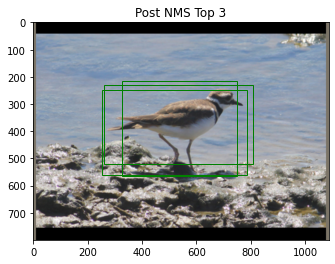

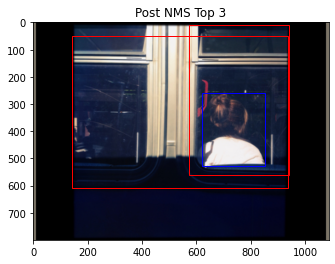

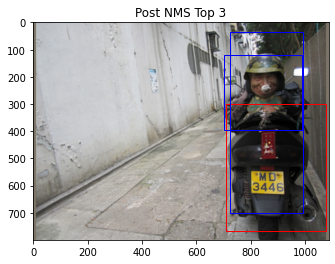

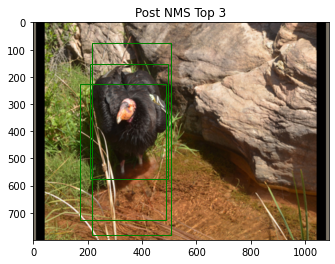

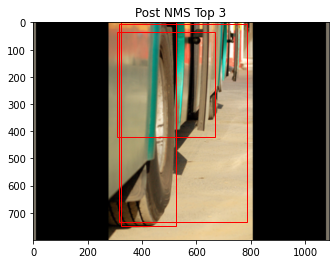

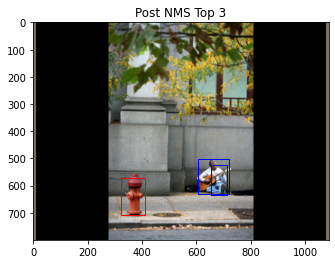

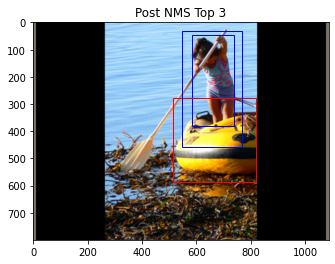

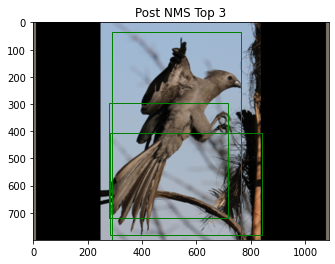

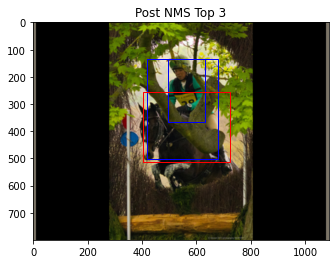

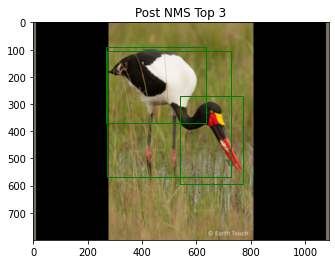

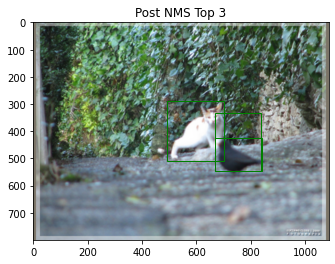

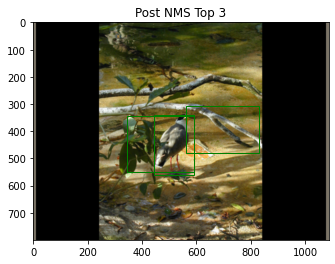

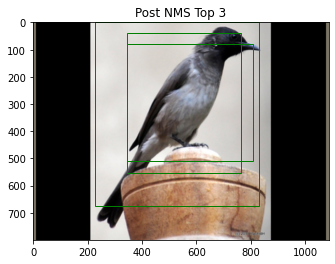

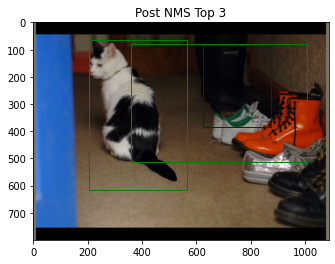

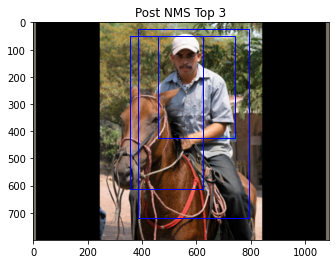

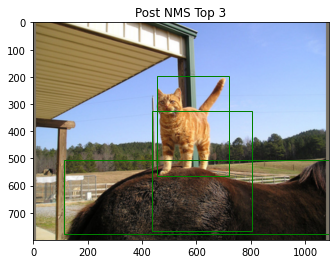

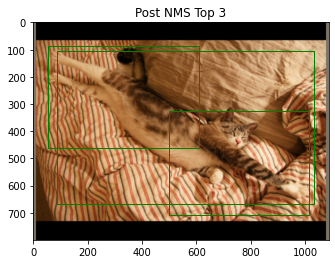

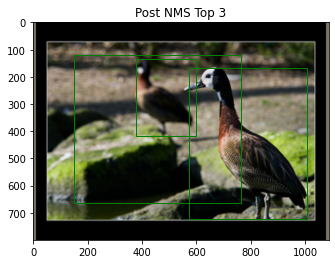

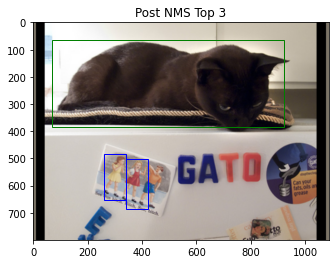

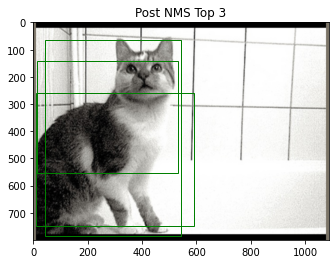

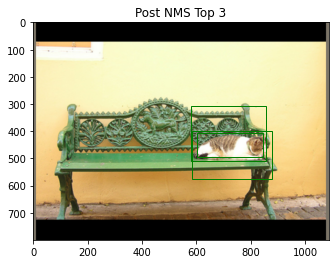

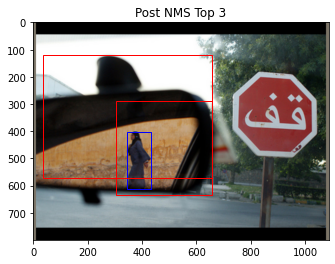

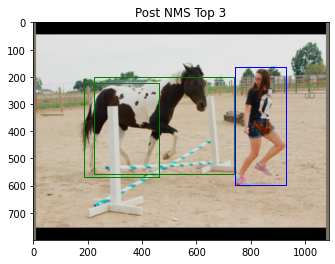

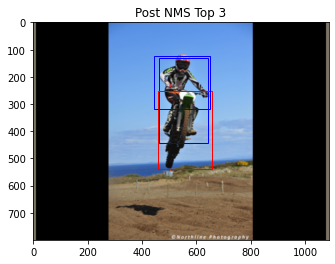

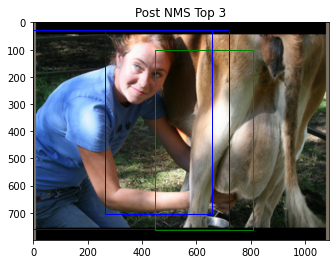

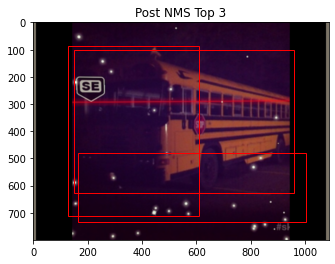

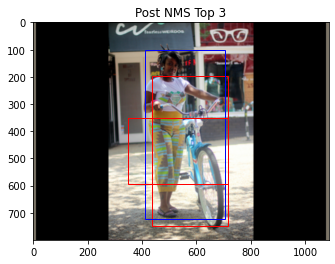

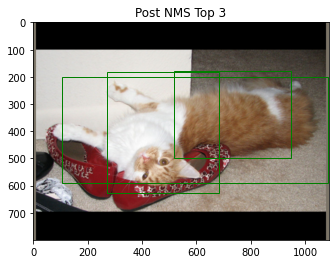

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
boxHead = BoxHead()

boxHead = boxHead.to(device)
checkpoint = torch.load('/content/drive/MyDrive/CIS680_2021/HW_4/test/epoch35')
boxHead.load_state_dict(checkpoint['model_state_dict'])
color_list = ['red','blue', 'green']

with torch.no_grad():
      backbone, rpn = pretrained_models_680(pretrained_path)

boxHead.evaluate = True
boxHead.eval()
backbone.eval()
rpn.eval()
start = time.time()
keep_topK = 200
keep_num_preNMS = 20
invTrans = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                              std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                        transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                              std = [ 1., 1., 1. ]),
                        ])


ind = 0
conf_thresh = 0.5
for iter, batch in enumerate(test_loader, 0):
    images = batch['images']
    gt_label = batch['labels']
    bbox = batch['bbox']

   
    backout = backbone(images)
    
    im_lis = ImageList(images, [(800, 1088)]*images.shape[0])
    
    rpnout = rpn(im_lis, backout)

    
    proposals=[proposal[0:keep_topK,:] for proposal in rpnout[0]]
    
    fpn_feat_list= list(backout.values())
  
    
    feature_vectors = boxHead.MultiScaleRoiAlign(fpn_feat_list,proposals)
    labels, regressor_target = boxHead.create_ground_truth(proposals, gt_label, bbox)
    
    class_logits, box_pred   = boxHead.forward(feature_vectors)

    l = 20
    conf_thresh = 0.5
    keep_num_preNMS = 50
    keep_num_post_NMS = 20
    NMS = True

    
    
    boxes_to_plot, scores, labels_to_plot = postprocess_detections(class_logits, box_pred, proposals, conf_thresh, keep_num_preNMS, keep_num_post_NMS)
    match_img, scores_img, trues_img = for_AP(scores.cpu(), labels_to_plot.cpu(), boxes_to_plot.cpu(), gt_label[0].cpu(), bbox[0].cpu())
   
    for i in range(1,4):
        matches[i].extend(match_img[i])
        score[i].extend(scores_img[i])
        trues[i] += trues_img[i]
    images = transforms.functional.normalize(images[0],
                                                    [-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
                                                    [1 / 0.229, 1 / 0.224, 1 / 0.225], inplace=False)
    
    images = images.cpu().float()
    plt.figure(iter)
    ax1 = plt.gca()
    plt.imshow(images.permute(1, 2, 0))
    title = 'Pre NMS Top ' + str(keep_num_preNMS)
    if NMS:
        title = 'Post NMS Top ' + str(keep_num_post_NMS)

    plt.title(title)

    print("boxes_to_plot: ",boxes_to_plot)
    for elem in range(boxes_to_plot.shape[0]):
        coord = boxes_to_plot[elem, :].view(-1)

        print("label: ", labels_to_plot[elem])
        col = color_list[labels_to_plot[elem]-1]
        rect = patches.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], fill=False,
                                    color=col)
        ax1.add_patch(rect)
    
    
    if iter == 10:
      break
    AP = average_precision(matches, score, trues)
    MAP = mAP(AP)
    print("Average Precision for each class: ", AP)
    print("Mean Average Precision: ", MAP)